In [3]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imsave, imread
from utils import show

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

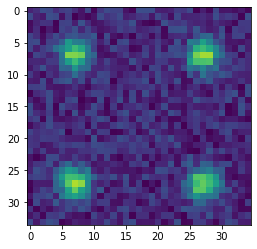

In [4]:
# classical pixel image
pixels = cle.push(imread("pixel_image.tif"))

show(pixels)

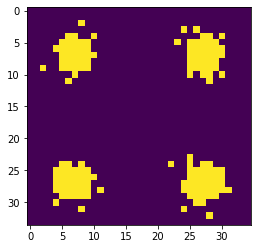

In [5]:
threshold = 0.25

binary_image = pixels > threshold
cle.imshow(binary_image)

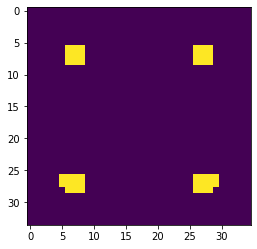

In [6]:
binary_eroded_image = cle.minimum_box(binary_image, radius_x=1, radius_y=1)

cle.imshow(binary_eroded_image)

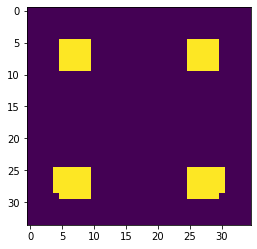

In [7]:
binary_opened_image = cle.maximum_box(binary_eroded_image, radius_x=1, radius_y=1)

cle.imshow(binary_opened_image)

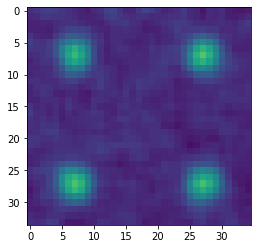

In [8]:
blurred_image = cle.mean_box(pixels, radius_x=1, radius_y=1)

show(blurred_image)

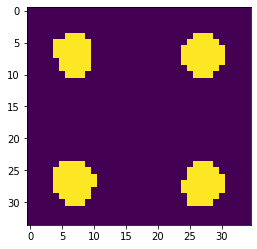

In [9]:
smoother_binary_image = blurred_image > threshold
cle.imshow(smoother_binary_image)

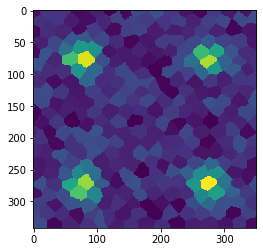

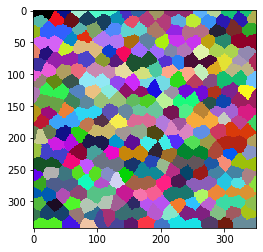

In [6]:
# labels + parametric map
labels = cle.push(imread("cells.tif"))
parametric_map = cle.push(imread("parametric_image.tif"))

show(parametric_map)
cle.imshow(labels, labels=True)

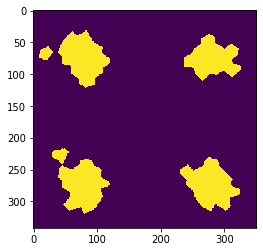

In [7]:
binary_map = parametric_map > threshold

show(binary_map)

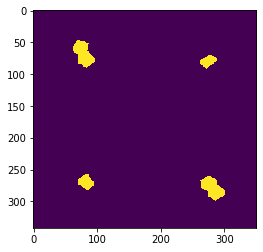

In [17]:
binary_eroded_map = cle.minimum_of_touching_neighbors_map(binary_map, labels)

show(binary_eroded_map)

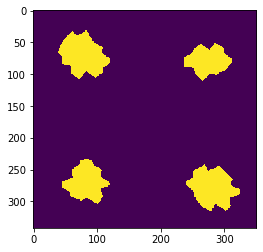

In [18]:
binary_opened_map = cle.maximum_of_touching_neighbors_map(binary_eroded_map, labels)

show(binary_opened_map)

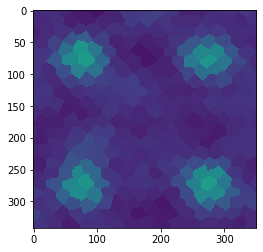

In [19]:
blurred_map = cle.mean_of_touching_neighbors_map(parametric_map, labels, radius=1)

show(blurred_map)

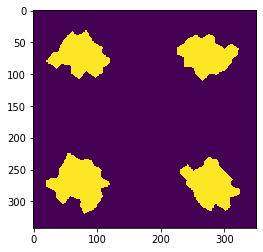

In [20]:
smoother_binary_map = blurred_map > threshold

show(smoother_binary_map)